## Regression
We will estimate the Doppler function with a series of underlying functions. First, we define the Doopler function:
$$ f(x) = \sqrt{x (1 - x)} \sin \left( \frac{2.1 \pi}{ x + 0.05 } \right) $$

We generate $n = 10,000$ samples $y = \mathrm{doppler}(x_i) + e_i$ with $x_i = i / n$ and $e_i \sim \mathcal{N}(0., .05^2)$

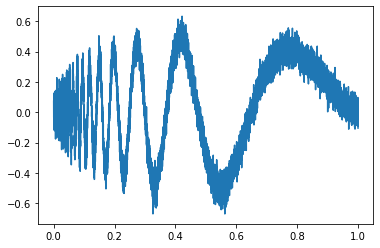

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
from numpy import linspace, pi, sin, sqrt
from numpy.random import normal

# Define the doppler function
def doppler (x):
    return sqrt(x * (1 - x)) * sin(2.1 * pi / (x + .05))

# Generate the data
x = linspace(0., 1., 10000)
y = doppler(x) + normal(loc=0., scale=0.05, size=x.shape)

# Plot
plt.plot(x, y, '-')
plt.show()

Now, we define a set of functions to fit the data

In [2]:
from numpy import cos, sin
from numpy.polynomial.legendre import legval

def trigonometric_basis (x, *params):
    # Define a simple basis with `sin` and `cos` terms
    simple_basis = lambda x, a, b, c, d: a * sin(b * x) + c * cos(d * x)
    # Run forward pass
    result = 0.
    for i in range(0, len(params), 4):
        result += simple_basis(x, params[i], params[i+1], params[i+2], params[i+3])
    # Return result
    return result
    
def legendre_basis (x, *params):
    return legval(x, params)

And finally, we compute the best fit for each basis:

In [3]:
from scipy.optimize import curve_fit

# Perform trig fit
TRIG_TERMS = 30
trig_params, trig_covariance = curve_fit(trigonometric_basis, x, y, [1.] * TRIG_TERMS * 4)

# Perform Legendre fit
LEGENDRE_TERMS = 10
legendre_params, legendre_covariance = curve_fit(legendre_basis, x, y, [1.] * LEGENDRE_TERMS * 4)